# Advanced Prep and Models

This notebook is simply a repeat of the 01 notebook but using the crefully crafted version of the data frm the 02 notebook to see if by doing a better job with the data we can make the models more accurate (not does not neccesarily mean better).

In [1]:
import pandas as pd
import warnings
from collections import OrderedDict
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Sampling
from sklearn.model_selection import train_test_split

# Classifiier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
titanic_df = pd.read_csv('titanic_features.csv')
titanic_df.head(5)

,PassengerClass,Survived,Age,FarePrice,Title_Aristocracy,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Professional,Sex_female,Sex_male
0,1,1,29,211,0,0,0,1,0,0,0,1,0
1,1,1,0,151,0,1,0,0,0,0,0,0,1
2,1,0,2,151,0,0,0,1,0,0,0,1,0
3,1,0,30,151,0,0,0,0,1,0,0,0,1
4,1,0,25,151,0,0,0,0,0,1,0,1,0


In [3]:
titanic_df.shape

(1309, 13)

In [4]:
target_df = titanic_df['Survived']
features_df = titanic_df.drop(['Survived'],axis=1)

In [5]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3, random_state=42)

##############################################################################
# Logistic Regression  
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = lr.score(X_test, y_test)

##############################################################################
# Create a random Forest Classifier instance
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accuracy = rfc.score(X_test, y_test) # = accuracy

##############################################################################
#Decision Tree
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train,  y_train)
y_pred = dtree.predict(X_test)
dtree_accuracy = dtree.score(X_test,  y_test) 
    
#############################################################################    
#Support Vector Machine
suppvc = SVC(gamma = 0.001)
suppvc.fit(X_train, y_train)
y_pred = suppvc.predict(X_test)
suppvc_accuracy = suppvc.score(X_test, y_test) 

print("Logistic Regression: " + str(round(lr_accuracy, 2)))
print("Random Forest: " + str(round(rfc_accuracy,2)))
print("Decision Tree: " + str(round(dtree_accuracy,2)))
print("Support Vector Machine: " + str(round(suppvc_accuracy,2)))

Logistic Regression: 0.78
Random Forest: 0.79
Decision Tree: 0.79
Support Vector Machine: 0.64


C:\dev\bin\Ana3_64\envs\scale\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


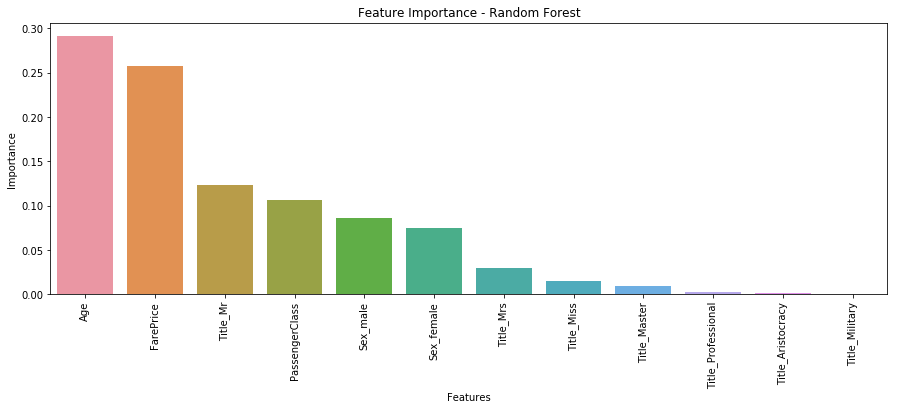

In [6]:
features = features_df.columns.tolist()
fi = rfc.feature_importances_
sorted_features = {}
for feature, imp in zip(features, fi):
    sorted_features[feature] = round(imp,3)

# sort the dictionnary by value
sorted_features = OrderedDict(sorted(sorted_features.items(),reverse=True, key=lambda t: t[1]))
dfvi = pd.DataFrame(list(sorted_features.items()), columns=['Features', 'Importance'])
plt.figure(figsize=(15, 5))
plt.title('Feature Importance - Random Forest')
sns.barplot(x='Features', y='Importance', data=dfvi);
plt.xticks(rotation=90) 
plt.show()

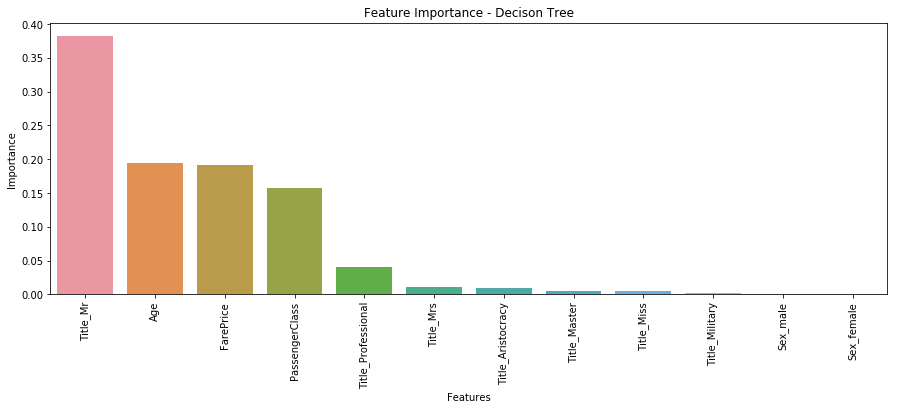

In [7]:
features = features_df.columns.tolist()
fi = dtree.feature_importances_
sorted_features = {}
for feature, imp in zip(features, fi):
    sorted_features[feature] = round(imp,3)

# sort the dictionnary by value
sorted_features = OrderedDict(sorted(sorted_features.items(),reverse=True, key=lambda t: t[1]))

dfvi = pd.DataFrame(list(sorted_features.items()), columns=['Features', 'Importance'])
plt.figure(figsize=(15, 5))
plt.title('Feature Importance - Decison Tree')
sns.barplot(x='Features', y='Importance', data=dfvi);
plt.xticks(rotation=90) 
plt.show()